In [2]:
#content based filtering on data set
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

In [3]:
#for interactive analysis
from ipywidgets import interact

In [4]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\content filtering\\Netflix_Dataset_Movie.csv")
df.head(10)

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
5,6,1997,Sick
6,7,1992,8 Man
7,8,2004,What the #$*! Do We Know!?
8,9,1991,Class of Nuke 'Em High 2
9,10,2001,Fighter


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [6]:
df.shape

(17770, 3)

In [7]:
df.describe()

,Movie_ID,Year
count,17770.000000,17770.000000
mean,8885.500000,1990.235566
std,5129.901477,16.564501
min,1.000000,1915.000000
25%,4443.250000,1985.000000
50%,8885.500000,1997.000000
75%,13327.750000,2002.000000
max,17770.000000,2005.000000


In [8]:
rating=pd.read_csv("C:\\Users\\HP\\Downloads\\content filtering\\Netflix_Dataset_Rating.csv")

In [9]:
rating.head(10)

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
5,439011,1,3
6,1644750,3,3
7,2031561,4,3
8,616720,4,3
9,2467008,4,3


In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


In [11]:
rating.describe()

,User_ID,Rating,Movie_ID
count,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03
std,7.646923e+05,1.062665e+00,1.303458e+03
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602280e+05,3.000000e+00,1.176000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03


In [12]:
rating.shape

(17337458, 3)

In [13]:
data=pd.merge(df,rating,on='Movie_ID',how="inner")

In [14]:
data.head(10)

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
5,3,1997,Character,439011,1
6,3,1997,Character,1644750,3
7,3,1997,Character,2031561,4
8,3,1997,Character,616720,4
9,3,1997,Character,2467008,4


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_ID  int64 
 1   Year      int64 
 2   Name      object
 3   User_ID   int64 
 4   Rating    int64 
dtypes: int64(4), object(1)
memory usage: 661.4+ MB


In [16]:
data.describe()

,Movie_ID,Year,User_ID,Rating
count,1.733746e+07,1.733746e+07,1.733746e+07,1.733746e+07
mean,2.302783e+03,1.993895e+03,1.321158e+06,3.590570e+00
std,1.303458e+03,1.248583e+01,7.646923e+05,1.062665e+00
min,3.000000e+00,1.920000e+03,6.000000e+00,1.000000e+00
25%,1.176000e+03,1.990000e+03,6.602280e+05,3.000000e+00
50%,2.342000e+03,1.999000e+03,1.316775e+06,4.000000e+00
75%,3.433000e+03,2.002000e+03,1.983213e+06,4.000000e+00
max,4.496000e+03,2.005000e+03,2.649429e+06,5.000000e+00


In [17]:
data.shape

(17337458, 5)

In [18]:
#As we don't require movie_id and user_id for anlaysis
data=data.drop(['Movie_ID','User_ID'],axis=1)

In [19]:
data.rename(columns={'Name':'Movie_Name'},inplace=True)

In [20]:
data.head(10)

,Year,Movie_Name,Rating
0,1997,Character,5
1,1997,Character,4
2,1997,Character,3
3,1997,Character,5
4,1997,Character,4
5,1997,Character,1
6,1997,Character,3
7,1997,Character,4
8,1997,Character,4
9,1997,Character,4


In [21]:
#grouping dataset based on movie name and year
data=pd.pivot_table(data,index=['Movie_Name','Year'],aggfunc='mean')
data.reset_index(level=['Movie_Name','Year'], inplace = True)
data.head(10)

,Movie_Name,Year,Rating
0,10,1979,3.113049
1,10 Things I Hate About You,1999,3.703471
2,101 Dalmatians II: Patch's London Adventure,2003,3.528282
3,11:14,2005,3.260153
4,13 Ghosts,1960,3.595732
5,18 Again,1988,2.777365
6,1984,1984,3.416936
7,2 Fast 2 Furious,2003,3.265767
8,200 Cigarettes,1999,2.991474
9,2010: The Year We Make Contact,1984,3.483454


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


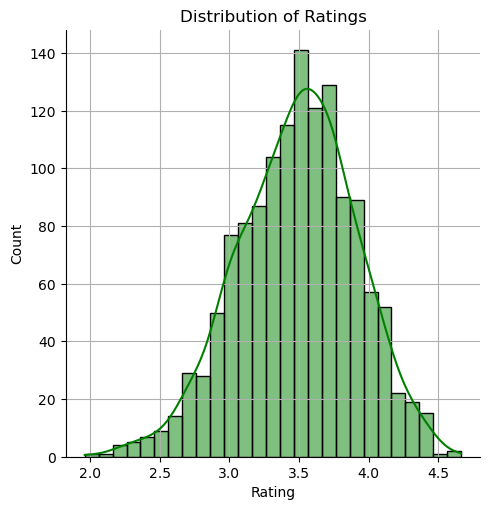

In [22]:
#checking distribution of rating
sns.displot(x=data['Rating'], color = 'green',kde=True,height=5)
plt.title('Distribution of Ratings')
plt.grid()

In [23]:
data['Year'].value_counts()[:6]

Year
2002    96
2004    95
2001    93
2003    84
2000    79
1998    71
Name: count, dtype: int64

In [24]:
data['Year'].unique()

array([1979, 1999, 2003, 2005, 1960, 1988, 1984, 2002, 2004, 1986, 2001,
       1951, 1964, 1993, 1995, 1935, 1987, 1997, 1955, 2000, 1994, 1998,
       1972, 1982, 1992, 1978, 1930, 1983, 1974, 1990, 1996, 1971, 1968,
       1925, 1946, 1985, 1962, 1959, 1961, 1966, 1991, 1938, 1989, 1963,
       1973, 1931, 1981, 1939, 1975, 1954, 1965, 1980, 1976, 1957, 1953,
       1956, 1944, 1941, 1952, 1958, 1934, 1949, 1970, 1969, 1936, 1940,
       1929, 1977, 1942, 1947, 1920, 1943, 1967], dtype=int64)

In [25]:
#convert rating column to int data type
data['Rating']=data['Rating'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_Name  1350 non-null   object
 1   Year        1350 non-null   int64 
 2   Rating      1350 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 26.5+ KB


In [26]:
data.head(10)

,Movie_Name,Year,Rating
0,10,1979,3
1,10 Things I Hate About You,1999,3
2,101 Dalmatians II: Patch's London Adventure,2003,3
3,11:14,2005,3
4,13 Ghosts,1960,3
5,18 Again,1988,2
6,1984,1984,3
7,2 Fast 2 Furious,2003,3
8,200 Cigarettes,1999,2
9,2010: The Year We Make Contact,1984,3


In [27]:
#check for latest movies in the dataset
data[data['Year'] == data['Year'].max()][['Movie_Name','Rating']].sort_values(by = 'Rating',ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,Movie_Name,Rating
0,Alias: Season 4,4
1,Batman Begins,4
2,Coach Carter,4
3,The L Word: Season 2,4
4,11:14,3
5,Nobody Knows,3
6,The Sandlot 2,3
7,The Pacifier,3
8,The Hitchhiker's Guide to the Galaxy,3
9,The Amityville Horror,3


In [28]:
#check for movies that got atleast 4 star reviews
print("Movies that recieved atleast 4 Star Reviews :", data[data['Rating'] == 4]['Movie_Name'].count())
print("Chances of Movies Getting 4 Star Reviews : {0:.2f}%".format((data[data['Rating'] == 4]['Movie_Name'].count())/(data.shape[0])))

Movies that recieved atleast 4 Star Reviews : 146
Chances of Movies Getting 4 Star Reviews : 0.11%


In [29]:
#check for movies that got 1 star reviews
print("Movies that recieved 1 Star Reviews :", data[data['Rating'] == 1]['Movie_Name'].count())
print("Chances of Movies Getting 1 Star Reviews : {0:.2f}%".format((data[data['Rating'] == 1]['Movie_Name'].count())/(data.shape[0])))

Movies that recieved 1 Star Reviews : 1
Chances of Movies Getting 1 Star Reviews : 0.00%


In [30]:
data.to_csv("merged_dataset.csv",index=False)